In [0]:
import numpy as np
import matplotlib.pyplot as plt
import requests

In [53]:
## H2O Gas
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826   #kJ/mol
deltaS_298=188.835    #J/mol

dT=0.001
T=np.arange(298,400,dT)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas
print(T[0:16])
print(deltaS_gas[0:16])


[298.    298.001 298.002 298.003 298.004 298.005 298.006 298.007 298.008
 298.009 298.01  298.011 298.012 298.013 298.014 298.015]
[188.83511271 188.83522543 188.83533814 188.83545086 188.83556357
 188.83567628 188.835789   188.83590171 188.83601442 188.83612713
 188.83623984 188.83635256 188.83646527 188.83657798 188.83669069
 188.8368034 ]


In [0]:
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830   #kJ/mol
deltaS_298=69.95    #J/mol

dT=0.001
T=np.arange(298,400,dT)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

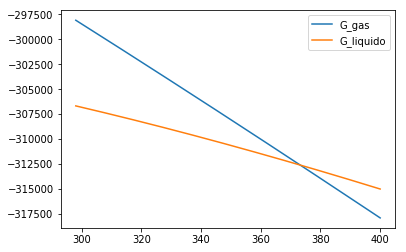

In [49]:
plt.plot(T,deltaG_gas,label="G_gas")
plt.plot(T,deltaG_liq,label="G_liquido")
plt.legend()
plt.show()

In [45]:
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp)
n=np.where(dp==minimo)[0][0]
T[n]

373.21457981010144

In [12]:
T[n]

373.2149999982214

In [0]:
import requests

In [0]:
url=""
file=requests.get(url)
datos=file.text
datos

In [0]:
def leerArchivo(path):
    file=open(path,"r")
    datos=file.read()
    datos=datos.split("\n")[3:-1]
    mat=[]
    for x in datos:
        s=x.split("\t")
        mat.append([float(a) for a in s])
    mat=np.array(mat)
    return mat

def leerArchivoUrl(url):
    file=requests.get(url)
    datos=file.text;
    print(datos)
    datos=datos.split("\n")[2:-1]
    mat=[]
    for x in datos:
        s=x.split("\t")
        mat.append([float(a) for a in s])
    mat=np.array(mat)
    return mat

Water (H2O)	H2O1(g)
T(K)	Cp	S	-[G-H(Tr)]/T	H-H(Tr)	delta-f H	delta-f G	log Kf
100	33.299	152.388	218.534	-6.615	-240.083	-236.584	123.579
200	33.349	175.485	191.896	-3.282	-240.900	-232.766	60.792
298.15	33.590	188.834	188.834	0.	-241.826	-228.582	40.047
300	33.596	189.042	188.835	0.062	-241.844	-228.500	39.785
400	34.262	198.788	190.159	3.452	-242.846	-223.901	29.238
500	35.226	206.534	192.685	6.925	-243.826	-219.051	22.884
600	36.325	213.052	195.550	10.501	-244.758	-214.007	18.631
700	37.495	218.739	198.465	14.192	-245.632	-208.812	15.582
800	38.721	223.825	201.322	18.002	-246.443	-203.496	13.287
900	39.987	228.459	204.084	21.938	-247.185	-198.083	11.496


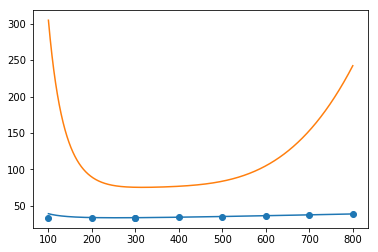

In [36]:
url_H2O_liq="https://raw.githubusercontent.com/pgbeermann2017/QM206/master/H2O_liq.txt"
url_H2O_gas="https://raw.githubusercontent.com/pgbeermann2017/QM206/master/H2O_gas.txt"
mat=leerArchivoUrl(url_H2O_gas)
Texp=mat[:,0]
Cp=mat[:,1]
plt.scatter(Texp,Cp)
plt.plot(T,Cp_H2O_gas)
plt.plot(T,Cp_H2O_liq)
plt.show()

In [14]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(T)

NameError: ignored

In [0]:
Cp_calc=beta.dot(X.T)

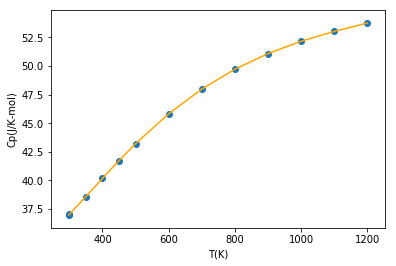

In [0]:

plt.plot(T,Cp_calc,color="orange")
plt.scatter(T,y)
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()